<a href="https://colab.research.google.com/github/viniciusLourenzoni/Analise_dados_Olimpiadas/blob/main/AnaliseDadosOlimpiadas_ATUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

sns.set()

In [5]:
df_athlete_1 = pd.read_csv('https://raw.githubusercontent.com/viniciusLourenzoni/Analise_dados_Olimpiadas/main/athlete_events.csv', sep= ';')
df_athlete_2 = pd.read_csv('https://raw.githubusercontent.com/viniciusLourenzoni/Analise_dados_Olimpiadas/main/athlete_events_2t.csv', sep= ';')
df_events_dict = pd.read_csv('https://raw.githubusercontent.com/viniciusLourenzoni/Analise_dados_Olimpiadas/main/athlete_events_data_dictionary.csv')
df_country_def = pd.read_csv ('https://raw.githubusercontent.com/viniciusLourenzoni/Analise_dados_Olimpiadas/main/country_definitions.csv')
df_country_dict = pd.read_csv('https://raw.githubusercontent.com/viniciusLourenzoni/Analise_dados_Olimpiadas/main/country_definitions_data_dictionary.csv')

<ipython-input-5-5ffcbbd52356>:1: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-5-5ffcbbd52356>:2: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
df_atleta = pd.concat([df_athlete_1,df_athlete_2])

In [7]:
df_atleta.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [8]:
df_country_def.head(20)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [50]:
merged = pd.merge(df_atleta, df_country_def, on='NOC', how='left')
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [10]:
print(df_country_def)

     NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]


In [51]:
print("Numero de Observações:\t {}".format(df_atleta.shape[0]))
print("Variaveis:\t{}\n".format(df_atleta.shape[1]))

Numero de Observações:	 271116
Variaveis:	15



In [53]:
df_df_atleta_types = pd.DataFrame(df_atleta.dtypes, columns = ['Tipos'])
df_df_atleta_types

,Tipos
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,object
Team,object
NOC,object
Games,object
Year,int64


In [52]:
print("\nValores Únicos:")
print(df_atleta.nunique().sort_values())


Valores Únicos:
Sex            2
Season         2
Medal          3
Year          35
City          42
Games         51
Sport         66
Age           74
Height        95
NOC          230
Weight       395
Event        765
Team        1184
Name      134732
ID        135571
dtype: int64


In [14]:
df_atleta.isnull().sum().sort_values(ascending=False)

Medal     231333
Weight     62875
Height     60171
Age         9474
ID             0
Name           0
Sex            0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
dtype: int64

In [15]:
(df_atleta.isnull().sum() / df_atleta.shape[0]).sort_values(ascending=False)

Medal     0.853262
Weight    0.231912
Height    0.221938
Age       0.034944
ID        0.000000
Name      0.000000
Sex       0.000000
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
dtype: float64

In [55]:
mean_athlete = df_atleta.groupby(['Sex'])['Age'].mean()
print(mean_athlete)

Sex
F    23.732881
M    26.277562
Name: Age, dtype: float64


In [17]:
df_atleta[['Age']].describe()

,Age
count,261642.000000
mean,25.556898
std,6.393561
min,10.000000
25%,21.000000
50%,24.000000
75%,28.000000
max,97.000000


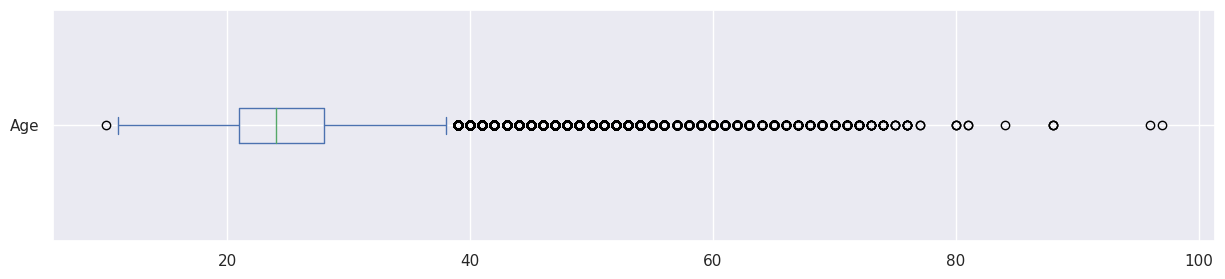

In [18]:
df_atleta.Age.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

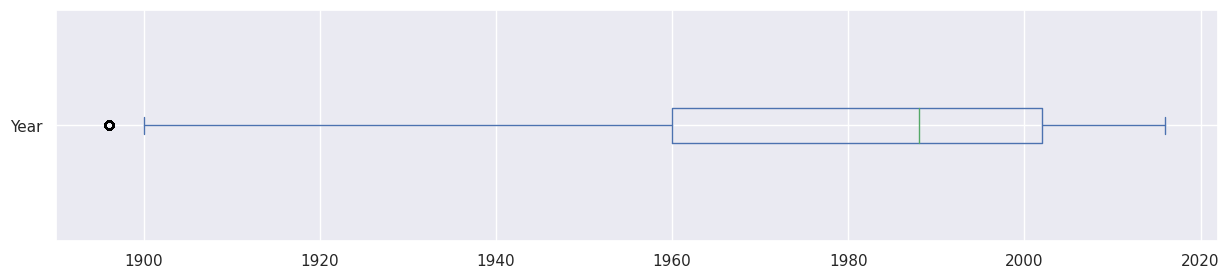

In [19]:
df_atleta.Year.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

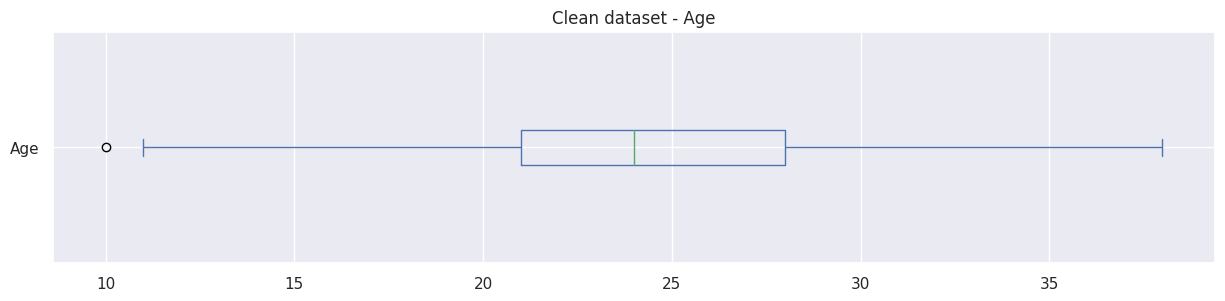

In [57]:
df_clean = df_atleta[(df_atleta['Age'] <= 38.5)].copy()

fig, ax = plt.subplots(figsize=(15,3))
df_clean['Age'].plot(kind='box', vert=False)
ax.set_title('Clean dataset - Age')
plt.show()

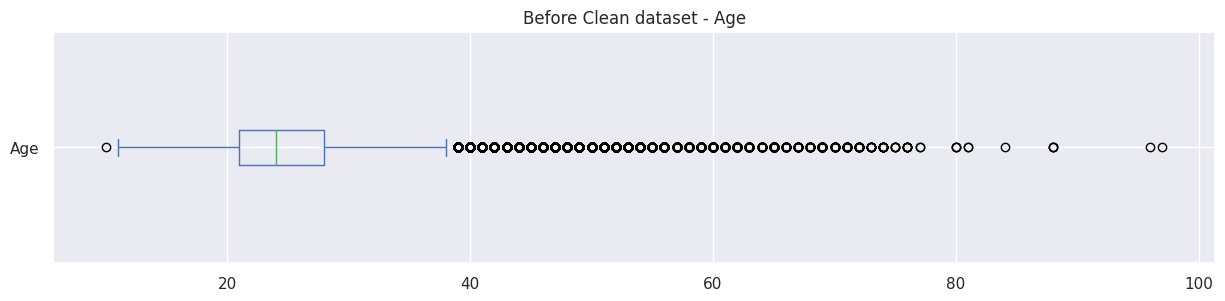

In [22]:
fig, ax = plt.subplots(figsize=(15,3))
df_atleta['Age'].plot(kind='box', vert=False)
ax.set_title('Before Clean dataset - Age')
plt.show()

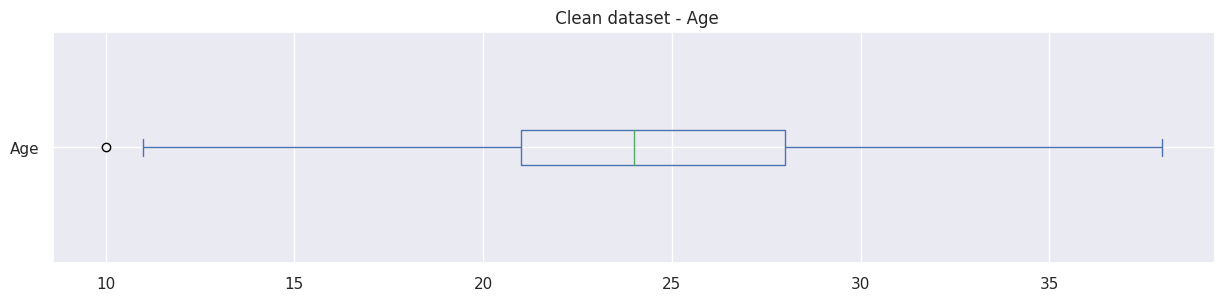

In [23]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean['Age'].plot(kind='box', vert=False)
ax.set_title(' Clean dataset - Age')
plt.show()

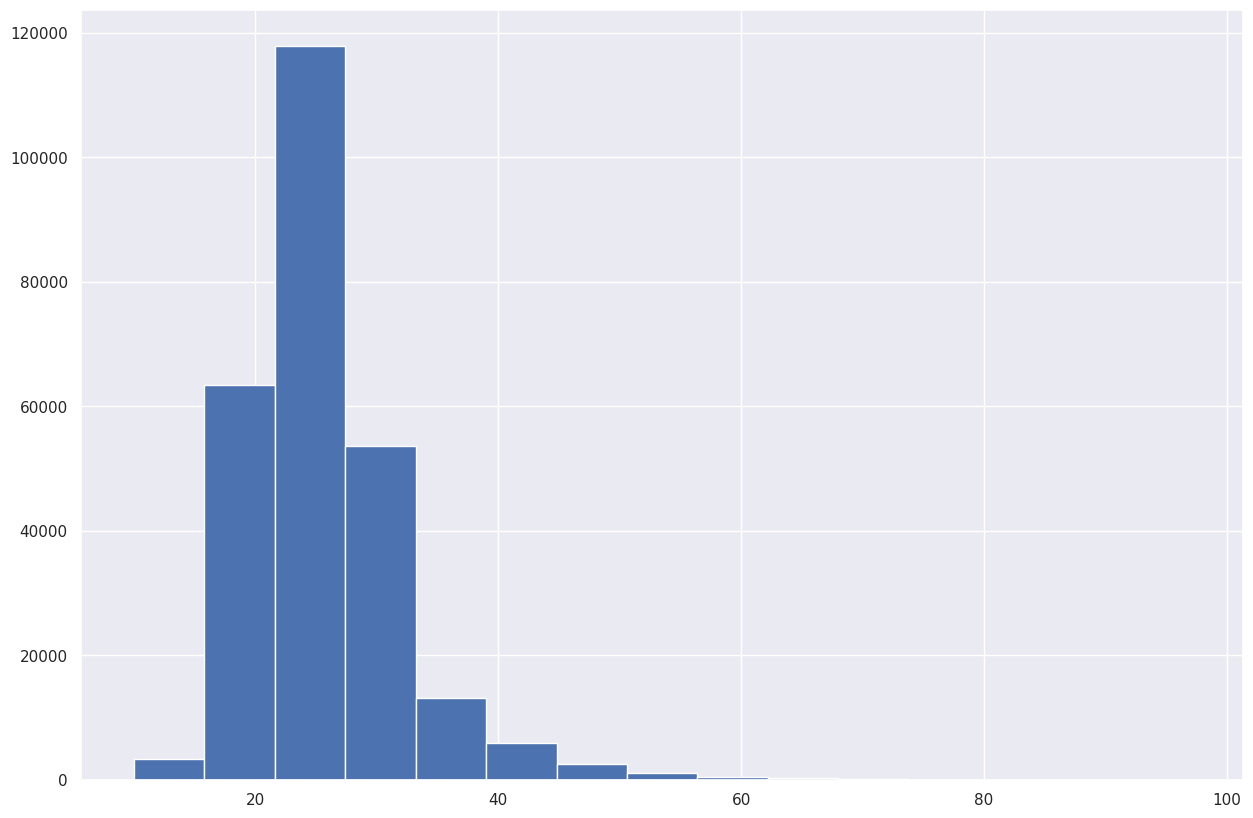

In [24]:
df_atleta.Age.hist(bins=15, figsize=(15,10));

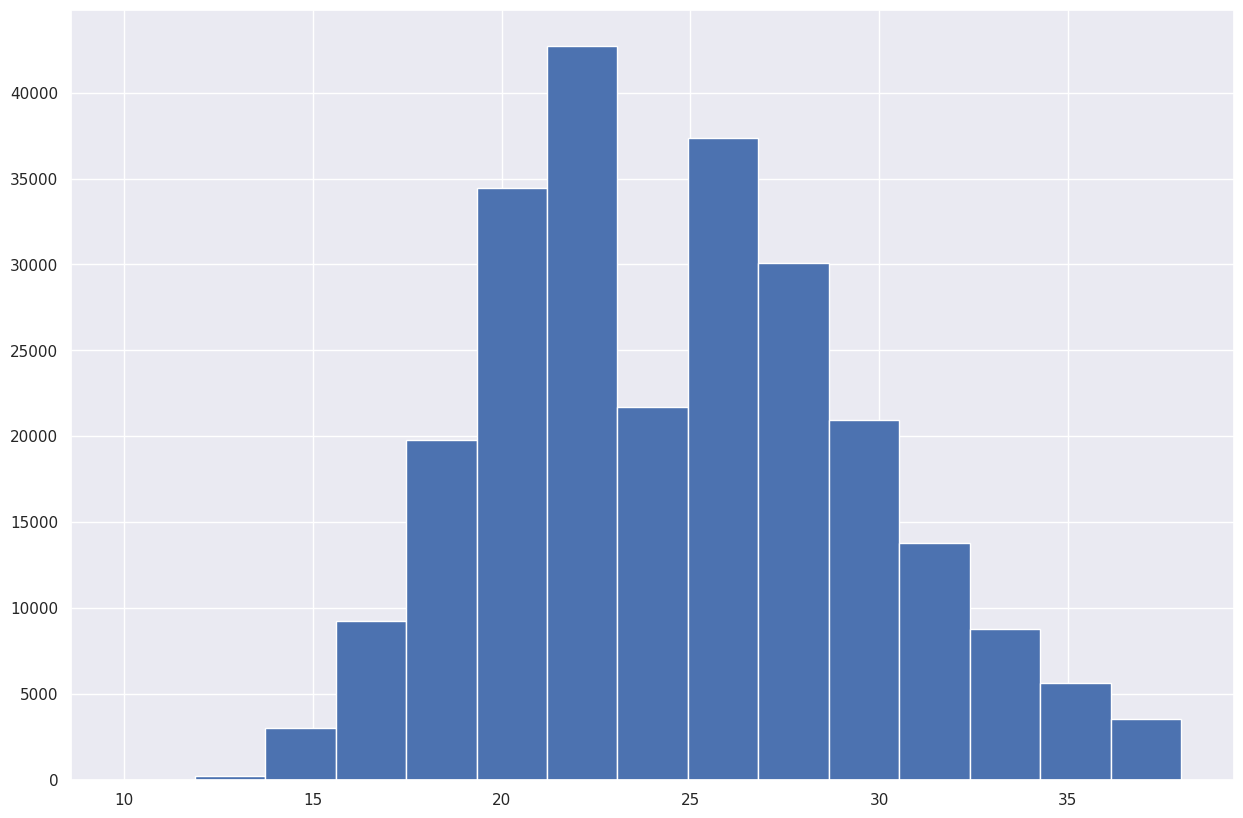

In [25]:
df_clean.Age.hist(bins=15, figsize=(15,10));

In [26]:
df_atleta["Age"].sort_values(ascending=False)

121499    97.0
98118     96.0
60863     88.0
60861     88.0
60862     88.0
          ... 
135124     NaN
135219     NaN
135238     NaN
135249     NaN
135250     NaN
Name: Age, Length: 271116, dtype: float64

In [27]:
df_atleta[df_atleta["Age"] >= 88.0]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
121499,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [28]:
df_atleta["Age"].sort_values(ascending=True)

7327      10.0
116676    11.0
101378    11.0
5095      11.0
101586    11.0
          ... 
135124     NaN
135219     NaN
135238     NaN
135249     NaN
135250     NaN
Name: Age, Length: 271116, dtype: float64

In [29]:
df_atleta[df_atleta["Age"] <= 11]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
43468,22411,Magdalena Cecilia Colledge,F,11.0,152.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN
73461,37333,Carlos Bienvenido Front Barrera,M,11.0,NaN,NaN,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Eights,NaN
79024,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
94058,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,NaN
101378,51268,Beatrice Hutiu,F,11.0,151.0,38.0,Romania,ROU,1968 Winter,1968,Winter,Grenoble,Figure Skating,Figure Skating Women's Singles,NaN
102916,52070,Etsuko Inada,F,11.0,NaN,NaN,Japan,JPN,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Figure Skating,Figure Skating Women's Singles,NaN
5095,70616,Liu Luyang,F,11.0,NaN,NaN,China,CHN,1988 Winter,1988,Winter,Calgary,Figure Skating,Figure Skating Mixed Ice Dancing,NaN
7327,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
17243,76675,Marcelle Matthews,F,11.0,NaN,NaN,South Africa,RSA,1960 Winter,1960,Winter,Squaw Valley,Figure Skating,Figure Skating Mixed Pairs,NaN
101586,118925,Megan Olwen Devenish Taylor (-Mandeville-Ellis),F,11.0,157.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NaN


In [58]:
df_atleta.Sex.value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

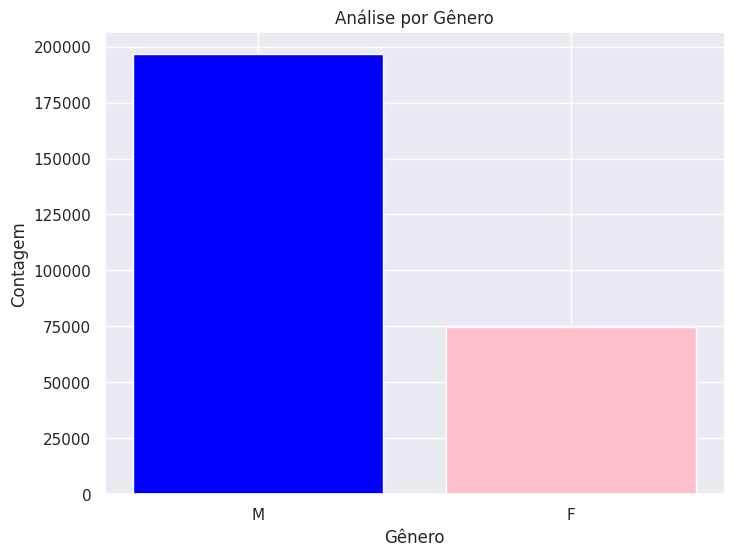

In [31]:
gender_counts = df_atleta['Sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Análise por Gênero')

plt.show()

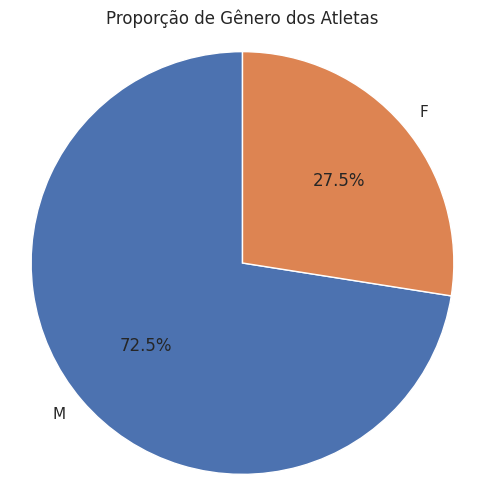

In [32]:
gender_proportion = df_atleta['Sex'].value_counts() / df_atleta.shape[0] * 100

plt.figure(figsize=(6, 6))
plt.pie(gender_proportion, labels=gender_proportion.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporção de Gênero dos Atletas')

plt.show()

In [33]:
df_atleta.Sex.value_counts() / df_atleta.shape[0] *100

M    72.512873
F    27.487127
Name: Sex, dtype: float64

In [34]:
df_atleta.Team.value_counts()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64

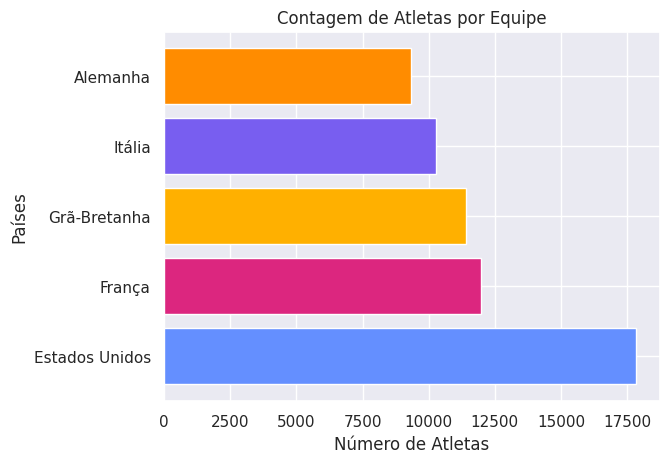

In [35]:
teams = ['Estados Unidos', 'França', 'Grã-Bretanha', 'Itália', 'Alemanha']
athletes = [17847, 11988, 11404, 10260, 9326]

colors = ['#648FFF', '#DC267F', '#FFB000', '#785EF0', '#FF8C00']

plt.barh(teams, athletes, color=colors)
plt.xlabel('Número de Atletas')
plt.ylabel('Países')
plt.title('Contagem de Atletas por Equipe')

plt.show()

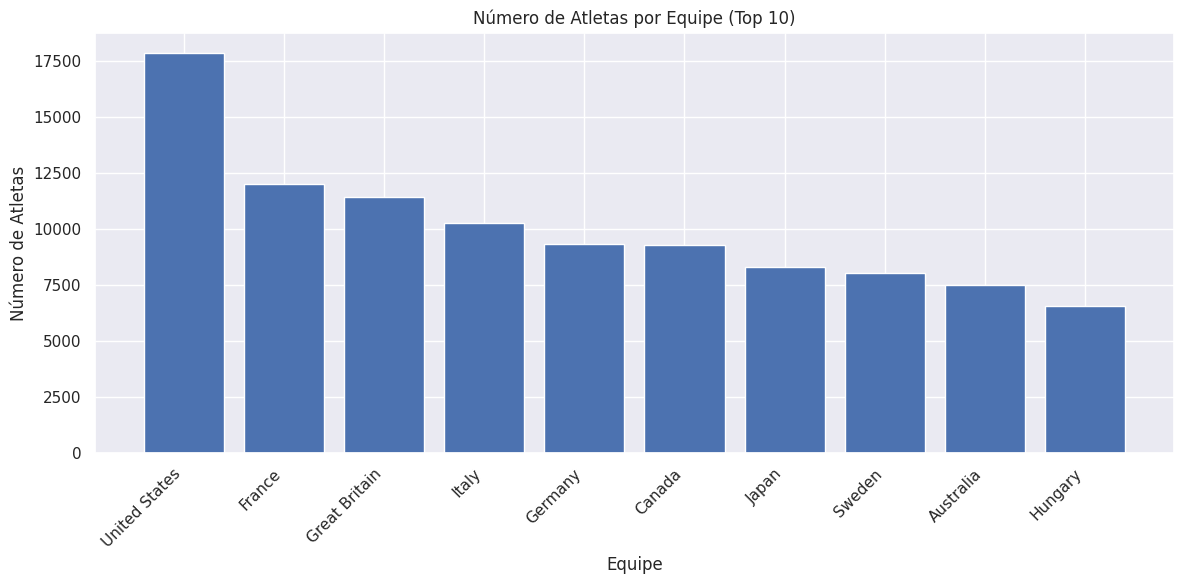

In [36]:
team_counts = df_atleta['Team'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(team_counts.index, team_counts.values)
plt.xlabel('Equipe')
plt.ylabel('Número de Atletas')
plt.title('Número de Atletas por Equipe (Top 10)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [37]:
df_atleta.Team.value_counts()/ df_atleta.shape[0] *100

United States    6.582791
France           4.421724
Great Britain    4.206318
Italy            3.784358
Germany          3.439856
                   ...   
Briar            0.000369
Hannover         0.000369
Nan-2            0.000369
Brentina         0.000369
Digby            0.000369
Name: Team, Length: 1184, dtype: float64

In [38]:
df_atleta.NOC.value_counts()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: NOC, Length: 230, dtype: int64

In [39]:
df_atleta.NOC.value_counts()/ df_atleta.shape[0] *100

USA    6.953850
FRA    4.705735
GBR    4.520574
ITA    3.952183
GER    3.625754
         ...   
YMD    0.001844
SSD    0.001107
UNK    0.000738
NBO    0.000738
NFL    0.000369
Name: NOC, Length: 230, dtype: float64

In [40]:
df_atleta["Sport"].nunique()

66

In [41]:
df_atleta["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [42]:
df_atleta[df_atleta["Sport"] == "Jeu De Paume"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
21488,11349,Edwin Anthony Biedermann (-Best),M,30.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
37344,19192,William Marshall Cazalet,M,42.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
82805,42060,"Jay Gould, II",M,19.0,NaN,NaN,United States,USA,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,Gold
9296,72692,Neville Stephen Bulwer-Lytton,M,29.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,Bronze
23389,79794,Eustace Hamilton Miles,M,39.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,Silver
37068,86723,Evan Baillie Noel,M,29.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
44614,90545,Arthur Page,M,32.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
45181,90836,Arnold Nottage Palmer,M,21.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
49551,93046,Vane Hungerford Pennell,M,31.0,176.0,NaN,Great Britain,GBR,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN
74341,105390,Charles Edward Sands,M,42.0,181.0,NaN,United States,USA,1908 Summer,1908,Summer,London,Jeu De Paume,Jeu De Paume Men's Singles,NaN


In [43]:
df_atleta.Sport.value_counts()/ df_atleta.shape[0] *100

Athletics        14.246300
Gymnastics        9.850765
Swimming          8.555379
Shooting          4.222547
Cycling           4.005297
                   ...    
Racquets          0.004426
Jeu De Paume      0.004057
Roque             0.001475
Basque Pelota     0.000738
Aeronautics       0.000369
Name: Sport, Length: 66, dtype: float64

In [44]:
dfG = merged[merged['Medal']=='Gold']
dfS = merged[merged['Medal']=='Silver']
dfB = merged[merged['Medal']=='Bronze']

In [45]:
merged.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

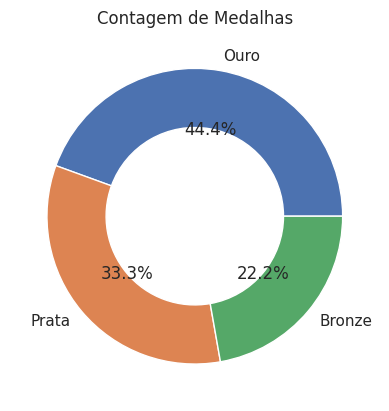

In [46]:
medal_types = ['Ouro', 'Prata', 'Bronze']
medal_counts = [100, 75, 50]

plt.pie(medal_counts, labels=medal_types, autopct='%1.1f%%', wedgeprops={'width': 0.4})


plt.title('Contagem de Medalhas')

circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.show()

In [47]:
dfG = merged[merged['Medal']=='Gold']
dfG.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


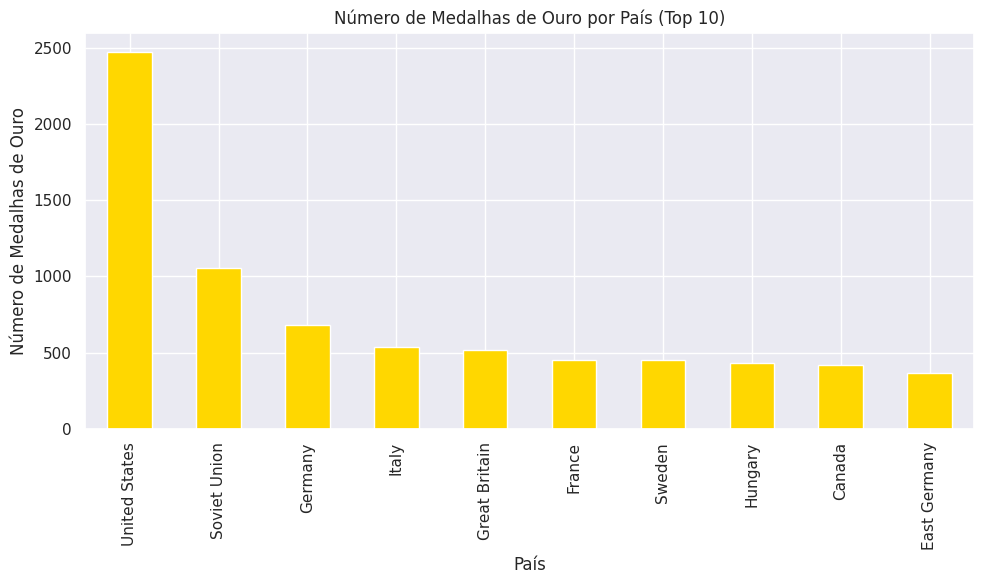

In [48]:
gold_counts = dfG['Team'].value_counts().head(10)


plt.figure(figsize=(10, 6))
gold_counts.plot(kind='bar', color='gold')
plt.xlabel('País')
plt.ylabel('Número de Medalhas de Ouro')
plt.title('Número de Medalhas de Ouro por País (Top 10)')


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Medalhas por País')

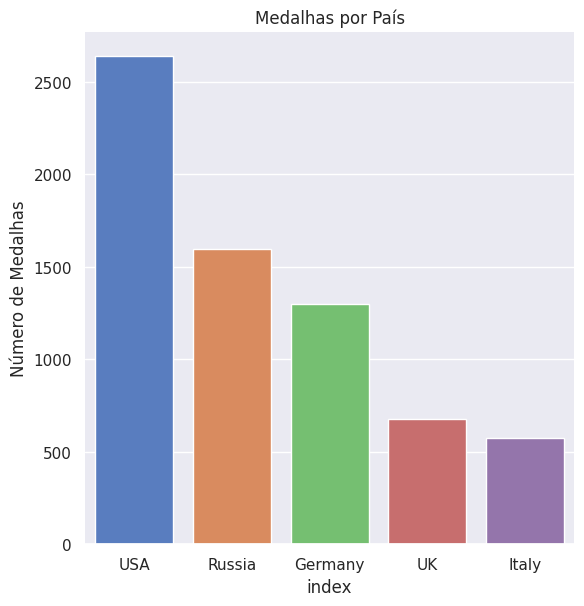

In [61]:
totaldfG = dfG.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totaldfG,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Número de Medalhas")
plt.title('Medalhas por País')

In [62]:
master= dfG['Sport'][dfG['Age'] > 40]
master.value_counts()

Equestrianism           82
Shooting                68
Sailing                 66
Fencing                 31
Archery                 26
Art Competitions        22
Alpinism                 7
Curling                  6
Bobsleigh                6
Polo                     4
Rowing                   3
Tug-Of-War               2
Tennis                   2
Cycling                  2
Canoeing                 1
Roque                    1
Cross Country Skiing     1
Wrestling                1
Golf                     1
Athletics                1
Water Polo               1
Motorboating             1
Croquet                  1
Name: Sport, dtype: int64

In [63]:
merged = merged.rename(columns = {'region':'Country'})

In [64]:
qeditions = merged.groupby(['Country'])['Year'].nunique().sort_values(ascending=False)
qeditions.head(20)

Country
Australia         35
France            35
Greece            35
UK                35
Italy             35
USA               35
Switzerland       35
Austria           34
Canada            34
Sweden            34
Denmark           34
Hungary           34
Norway            34
Czech Republic    33
Netherlands       33
Belgium           33
Finland           32
Germany           32
Argentina         31
Spain             30
Name: Year, dtype: int64